In [1]:
## plot within the notebook
%matplotlib inline
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from astrobject import instrument

In [7]:
# -- Load an instrument. SDSS image for instance
sdss = instrument("data/sdss_PTF10qjq_g.fits")
# - download the associated star catalogue online; only point with a g-mag between 13 and 21
sdss.download_catalogue(column_filters={"gmag":"13..24"})
# - run sextractor API sep to get the image's sources
sdss.sep_extract()

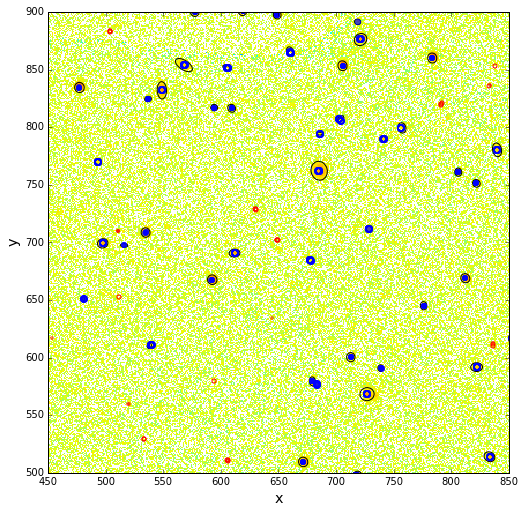

In [8]:
# - Lets see what the image looks like. Do not plot the sep output
# Reminder: fill/open marker = star/non-stars objects.
#           blue/red = detected by sep or not detected (is sep not ran, all blue)
pl = sdss.show(show_sepobjects=True,show_catalogue=True, zoomon=[650,700])

In [9]:
# - A PhotoMap is an astrobject associated to extracted sources.
# It run an aperture photometry on all the point sep_extract found
# and create a 'map' having the all the source's coordinates and 
# extracted fluxes.
# - In this example we ask for all the detected 'stars' and 
# not only the isolated one (see catalogue.define_isolated)
# (The latter choose between there is a lot of none isolated stars here)
# - In this example we do a simple circular aperture photometry
# default with a constant radius size of 6 pixels
p_map = sdss.get_stars_photomap(6,isolated_only=False)

ERROR: ValueError: fluxes and ra must have the same size [astrobject.astrobject.photometry]
ERROR:astropy:ValueError: fluxes and ra must have the same size


ValueError: fluxes and ra must have the same size

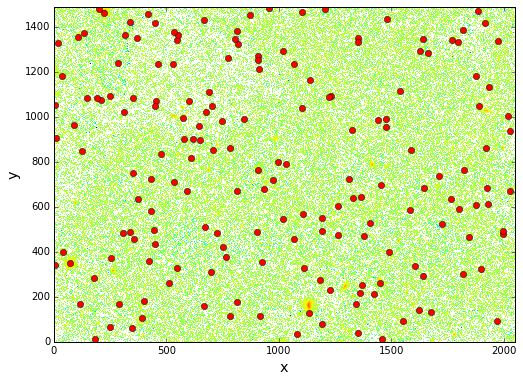

In [5]:
# - In the sdss.get_stars_photomap, several method have been ran
# and notably p_map.set_refmap which is an other PhotoMap p_map
# will use as reference. This refence map comes from catalogue.get_photomap.
# ----
# - Lets overplot in the image plot the points known by p_mas (the  stars)
sdss.show(show_sepobjects=False, show_catalogue=False)
x,y = np.asarray(p_map.wcs_xy).T
sdss._plot["ax"].plot(x,y,"ro",scalex=False,scaley=False)

In [6]:
# - The relative calibration of the image can easily be accessed 
# with the 'get' function if you provided a refence map.
# - let's check
p_map.has_refmap()

True

In [7]:
# - let's see what are the known keys
p_map.get('help')

 Known keys are: a, theta, b, flux_ratio, scaled_flux_ratio


(<matplotlib.collections.PolyCollection at 0x15bbb9850>,
 <matplotlib.colorbar.ColorbarBase instance at 0x15beeec68>)

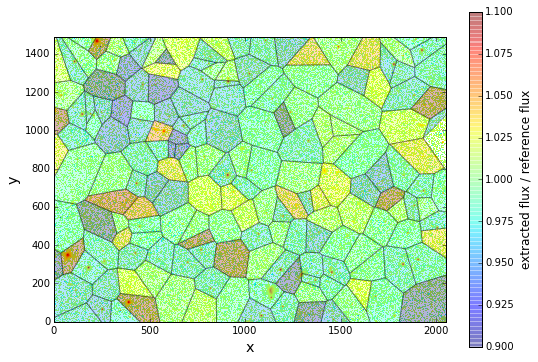

In [26]:
# - a,b, and theta are the sep_parameters known because 
# you set them in sdss.get_stars_photomap: we used p_map.set_sep_params()
# a and b are the major and minor ellipse axis found during sep_extract() 
# theta is the angle (in radian) of the ellipse. 
# - The Voronoi tesselation plotting tools enable to quickly have a look 
# to the spatial structure of the photomap's properties.
sdss.show(show_sepobjects=False, show_catalogue=False)
p_map.display_voronoi(sdss._plot["ax"],toshow="flux_ratio",alpha=0.3, 
                      cblabel="extracted flux / reference flux",edgecolors="k", 
                      vmin=0.9,vmax=1.1)
# = REMARK = the ratio is not exactly one because there is non-isolated stars
# - The core of the voronoi cells are all the p_map's stars
# - uncomment that to see them
# x,y = np.asarray(p_map.wcs_xy).T
# sdss._plot["ax"].plot(x,y,"xk",lw=2,ms=10,scalex=False,scaley=False)